### Grace Mitchell

# Private Construction Spending

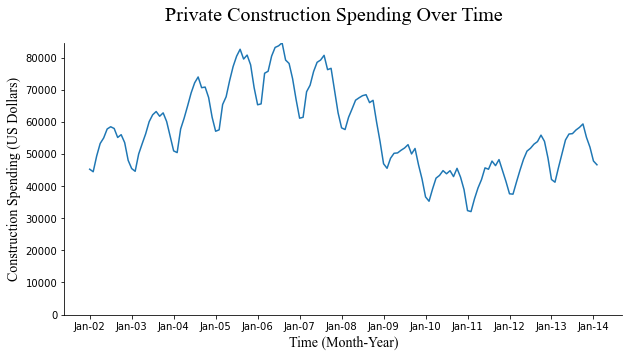

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
df_Construction = pd.read_csv("/Users/gracechi/Desktop/CTBA/M3/ConstructionTimeSeriesDataV2.csv")


x = df_Construction['Month-Year']
y2 = df_Construction['Private Construction']
fig,ax = plt.subplots()
ax.plot(x,y2)

#Set Ylim
ax.set_ylim(0,max(y2)+10)
#Remove spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
#Set X-Axis mark locations
x1 = [0,12,24,36,48,60,72,84,96,108,120,132,144]
#Xtick labels from x1 values
ax.set_xticks(x1)
#X-Axis label
ax.set_xlabel('Time (Month-Year)',fontsize='14',fontname='Times New Roman')
#Y-Axis label
ax.set_ylabel('Construction Spending (US Dollars)',fontsize='14',fontname='Times New Roman')
#Text on shading
#Graph title
fig.suptitle("Private Construction Spending Over Time",fontsize='20',fontname='Times New Roman')
#Graph size
plt.gcf().set_size_inches(10,5)
plt.show()

Average Squared Error per Month:  31701673.583670188
            Month Month-Year  Total Construction  Private Construction  \
2002-07-31      7     Jul-02               78863                 58494   
2002-08-31      8     Aug-02               79460                 57953   
2002-09-30      9     Sep-02               76542                 55157   
2002-10-31     10     Oct-02               75710                 56023   
2002-11-30     11     Nov-02               71362                 53552   
...           ...        ...                 ...                   ...   
2013-04-30    136     Apr-13               70535                 50022   
2013-05-31    137     May-13               77327                 54369   
2013-06-30    138     Jun-13               81722                 56228   
2013-07-31    139     Jul-13               83104                 56354   
2013-08-31    140     Aug-13               85677                 57481   

            Public Construction        MovAvg         sqEr

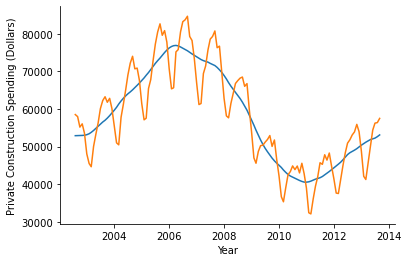

In [3]:
def sqErr(row):
    return (row['Private Construction'] - row['MovAvg'])**2

df_Construction['MovAvg'] = np.NaN
df_Construction['sqErr'] = np.NaN

date_data = {'Jan' : ('01', '31'), 'Feb' : ('02', '28'), 'Mar' : ('03', '31'), 'Apr' : ('04', '30'), 'May' : ('05', '31'), 'Jun' : ('06', '30'), 'Jul' : ('07', '31'), 'Aug' : ('08', '31'), 'Sep' : ('09', '30'), 'Oct' : ('10', '31'), 'Nov' : ('11', '30'), 'Dec' : ('12', '31')}
def to_data_range(date_str):
    return '20' + date_str[-2:] + '-' + date_data[date_str[:3]][0] + '-' + date_data[date_str[:3]][0]
df_Construction['Date'] = df_Construction['Month-Year'].apply(to_data_range)
df_Construction.index = pd.date_range(start=df_Construction['Date'].iloc[0], periods = df_Construction['Date'].shape[0], freq='M')

window = 12
window = window - window % 2
# Compute the moving average in the loop below using a window centered on the data point whose average is eing computed
for i in range(int(window/2),df_Construction.shape[0]-int(window/2)):
    df_Construction.loc[df_Construction.index[i],'MovAvg'] = (0.5*df_Construction.iloc[i - int(window/2)]['Private Construction'] + df_Construction.iloc[i - int(window/2)+1:i + int(window/2)]['Private Construction'].sum() + 0.5*df_Construction.iloc[i + int(window/2)]['Private Construction'])/float(window)

df_Construction['sqErr'] = (df_Construction['Private Construction'] - df_Construction['MovAvg'])**2


# The moving average cannot be applied to all rows and we need to delete those rows because we cannot use them in the analysis
df_Construction.dropna(how='any',inplace=True)

fig,ax = plt.subplots()
ax.plot(df_Construction['MovAvg'],label='Moving Avg.')
ax.plot(df_Construction['Private Construction'],label='Private Construction')
ax.set_xlabel('Year')
ax.set_ylabel('Private Construction Spending (Dollars)')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
print('Average Squared Error per Month: ',sum(df_Construction['sqErr'])/len(df_Construction))
print(df_Construction)

In [4]:
df_Construction['R1'] = df_Construction['Private Construction'] - df_Construction['MovAvg']
df_Construction['R1Error'] = abs((df_Construction['Private Construction'] - df_Construction['R1'])/df_Construction['Private Construction'])
df_Construction.style.format({
    'MovAvg': '{:.1f}'.format,
    'sqErr': '{:,.1f}'.format,
    'R1': '{:,.1f}'.format,
    'R1Error': '{:,.3f}'.format
})

,Month,Month-Year,Total Construction,Private Construction,Public Construction,MovAvg,sqErr,Date,R1,R1Error
2002-07-31 00:00:00,7,Jul-02,78863,58494,20369,52878.2,"31,536,648.1",2002-07-07,"5,615.8",0.904
2002-08-31 00:00:00,8,Aug-02,79460,57953,21507,52892.6,"25,607,395.1",2002-08-08,"5,060.4",0.913
2002-09-30 00:00:00,9,Sep-02,76542,55157,21385,52923.7,"4,987,777.8",2002-09-09,"2,233.3",0.960
2002-10-31 00:00:00,10,Oct-02,75710,56023,19687,52945.0,"9,474,084.0",2002-10-10,"3,078.0",0.945
2002-11-30 00:00:00,11,Nov-02,71362,53552,17810,52994.5,"310,759.8",2002-11-11,557.5,0.990
2002-12-31 00:00:00,12,Dec-02,63984,48023,15961,53142.5,"26,209,706.9",2002-12-12,"-5,119.5",1.107
2003-01-31 00:00:00,13,Jan-03,59877,45473,14404,53392.4,"62,717,160.3",2003-01-01,"-7,919.4",1.174
2003-02-28 00:00:00,14,Feb-03,58526,44620,13906,53767.5,"83,677,518.5",2003-02-02,"-9,147.5",1.205
2003-03-31 00:00:00,15,Mar-03,64506,49996,14510,54263.0,"18,207,289.0",2003-03-03,"-4,267.0",1.085
2003-04-30 00:00:00,16,Apr-03,69638,53195,16444,54821.3,"2,644,960.1",2003-04-04,"-1,626.3",1.031


Average Residual:  30.595149253731616


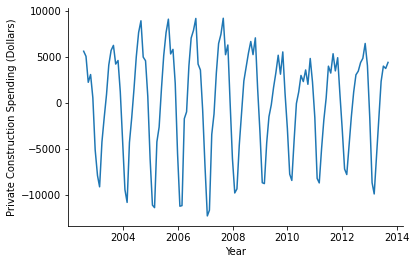

In [5]:
fig,ax = plt.subplots()
ax.plot(df_Construction['R1'])
ax.set_xlabel('Year')
ax.set_ylabel('Private Construction Spending (Dollars)')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
print('Average Residual: ', sum(df_Construction['R1'])/len(df_Construction))

In [6]:
maxCorr = 0.0
period = np.NaN
for i in range(1,37):
    corr = df_Construction['R1'].autocorr(lag=i)
    print('Correlation, lag ',i,'   ',corr)
    if corr > maxCorr:
        maxCorr = corr
        period = i
print('period = ',period,'     Maximum Correlation = ',maxCorr)

Correlation, lag  1     0.8012201439941184
Correlation, lag  2     0.4046160901273205
Correlation, lag  3     -0.06681918914657627
Correlation, lag  4     -0.46817065394656976
Correlation, lag  5     -0.7334595961596322
Correlation, lag  6     -0.8453947574465044
Correlation, lag  7     -0.7277714550926001
Correlation, lag  8     -0.45905643208796504
Correlation, lag  9     -0.06590030685316585
Correlation, lag  10     0.38876557877044954
Correlation, lag  11     0.7742521355064202
Correlation, lag  12     0.9718794492320808
Correlation, lag  13     0.7939675179405197
Correlation, lag  14     0.42010968825364053
Correlation, lag  15     -0.04354347496856092
Correlation, lag  16     -0.442926503934742
Correlation, lag  17     -0.7143108783050305
Correlation, lag  18     -0.8348740788345422
Correlation, lag  19     -0.7220461363177707
Correlation, lag  20     -0.46345532637190096
Correlation, lag  21     -0.07542839840758336
Correlation, lag  22     0.3757544697881611
Correlation, lag  2

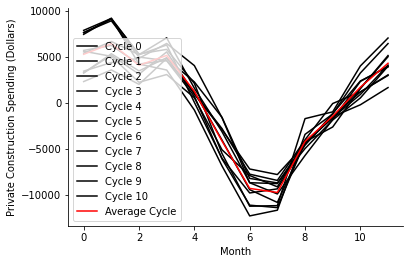

In [7]:
period = 12
cycleLen = period
numCycles = int(len(df_Construction)/cycleLen + 0.5)
cycles = [df_Construction.iloc[range(i*period,min((i+1)*period,len(df_Construction)))]['R1'] for i in range(numCycles)]
ptsInCycles = [df_Construction.iloc[range(i,len(df_Construction['R1']),period)]['R1'].tolist() for i in range(period)]
avg = [sum(pts)/len(pts) for pts in ptsInCycles]

fig,ax = plt.subplots()
for i in range(len(cycles)):
    ax.plot(cycles[i].values,label='Cycle '+str(i),c='k')
ax.plot(avg,label='Average Cycle',c='r')
ax.set_xlabel('Month')
ax.set_ylabel('Private Construction Spending (Dollars)')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.legend()

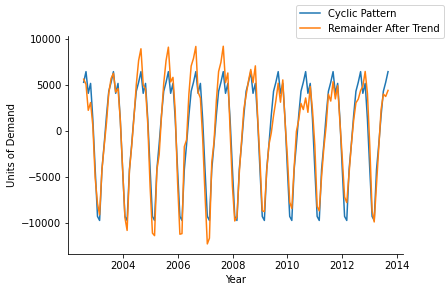

In [9]:
cycleLen = period   # see prior cell for computation of cyclicality period
numCycles = int(len(df_Construction)/cycleLen + 0.5)
df_Construction['C'] = np.NaN   # Creates an empty column for the cyclicality component data
for i in range(len(df_Construction)):
    df_Construction.loc[df_Construction.index[i], 'C'] = avg[i % cycleLen] # Write appropriate cyclicality value

fig,ax = plt.subplots()
ax.plot(df_Construction['C'],label='Cyclic Pattern')
ax.plot(df_Construction['R1'],label='Remainder After Trend')
ax.set_xlabel('Year')
ax.set_ylabel('Private Construction Spending')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
fig.legend()

Average Error:  0.020585783569537188
            Month Month-Year  Total Construction  Private Construction  \
2002-07-31      7     Jul-02               78863                 58494   
2002-08-31      8     Aug-02               79460                 57953   
2002-09-30      9     Sep-02               76542                 55157   
2002-10-31     10     Oct-02               75710                 56023   
2002-11-30     11     Nov-02               71362                 53552   
...           ...        ...                 ...                   ...   
2013-04-30    136     Apr-13               70535                 50022   
2013-05-31    137     May-13               77327                 54369   
2013-06-30    138     Jun-13               81722                 56228   
2013-07-31    139     Jul-13               83104                 56354   
2013-08-31    140     Aug-13               85677                 57481   

            Public Construction        MovAvg        Date           R1  \


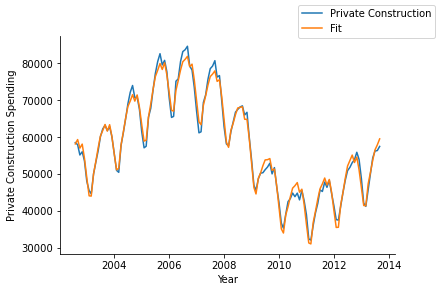

In [10]:
df_Construction['R2'] = df_Construction['R1'] - df_Construction['C']
df_Construction['R2Error'] = abs(df_Construction['R2']/df_Construction['Private Construction'])
df_Construction['fit'] = df_Construction['MovAvg'] + df_Construction['C']
df_Construction.drop(['sqErr'],axis=1,inplace=True)
print('Average Error: ', sum(df_Construction['R2Error'])/len(df_Construction))
print(df_Construction)
fig,ax = plt.subplots()
ax.plot(df_Construction['Private Construction'],label='Private Construction')
ax.plot(df_Construction['fit'], label = 'Fit')
ax.set_xlabel('Year')
ax.set_ylabel('Private Construction Spending')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
fig.legend()

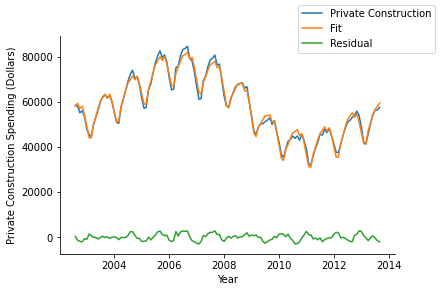

In [11]:
fig,ax = plt.subplots()
ax.plot(df_Construction['Private Construction'],label='Private Construction')
ax.plot(df_Construction['fit'],label='Fit')
ax.plot(df_Construction['R2'],label='Residual')
ax.set_xlabel('Year')
ax.set_ylabel('Private Construction Spending (Dollars)')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
fig.legend()

In [12]:
for a in [0.1 * i for i in range(1,20)]:
    df_Construction['aC'] = a*df_Construction['C']
    df_Construction['R3'] = df_Construction['R1'] - df_Construction['aC']
    df_Construction['sqErr'] = df_Construction['R3']**2
    print('Squared Error for a =','{:.1f}'.format(a),':',sum(df_Construction['sqErr']))
    #print('Average Error: ', sum(dfHS['R2Error'])/len(dfHS))

Squared Error for a = 0.1 : 3493035810.6966357
Squared Error for a = 0.2 : 2817519829.5514827
Squared Error for a = 0.3 : 2221476316.776349
Squared Error for a = 0.4 : 1704905272.3712325
Squared Error for a = 0.5 : 1267806696.3361347
Squared Error for a = 0.6 : 910180588.6710539
Squared Error for a = 0.7 : 632026949.3759911
Squared Error for a = 0.8 : 433345778.4509467
Squared Error for a = 0.9 : 314137075.8959202
Squared Error for a = 1.0 : 274400841.7109112
Squared Error for a = 1.1 : 314137075.8959201
Squared Error for a = 1.2 : 433345778.4509473
Squared Error for a = 1.3 : 632026949.375992
Squared Error for a = 1.4 : 910180588.6710545
Squared Error for a = 1.5 : 1267806696.3361342
Squared Error for a = 1.6 : 1704905272.371233
Squared Error for a = 1.7 : 2221476316.7763495
Squared Error for a = 1.8 : 2817519829.551484
Squared Error for a = 1.9 : 3493035810.696636


# Public Construction Spending

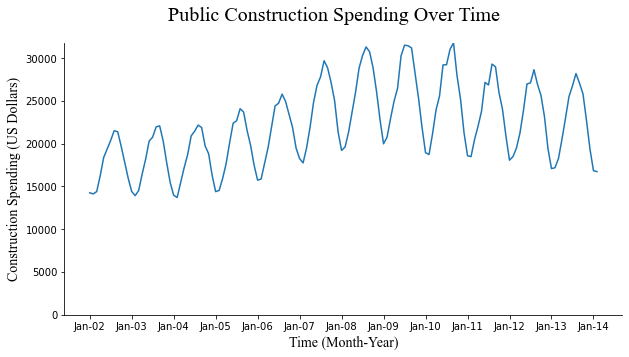

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
df_Construction = pd.read_csv("/Users/gracechi/Desktop/CTBA/M3/ConstructionTimeSeriesDataV2.csv")


x = df_Construction['Month-Year']
y2 = df_Construction['Public Construction']
fig,ax = plt.subplots()
ax.plot(x,y2)

#Set Ylim
ax.set_ylim(0,max(y2)+10)
#Remove spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
#Set X-Axis mark locations
x1 = [0,12,24,36,48,60,72,84,96,108,120,132,144]
#Xtick labels from x1 values
ax.set_xticks(x1)
#X-Axis label
ax.set_xlabel('Time (Month-Year)',fontsize='14',fontname='Times New Roman')
#Y-Axis label
ax.set_ylabel('Construction Spending (US Dollars)',fontsize='14',fontname='Times New Roman')
#Text on shading
#Graph title
fig.suptitle("Public Construction Spending Over Time",fontsize='20',fontname='Times New Roman')
#Graph size
plt.gcf().set_size_inches(10,5)
plt.show()

Average Squared Error per Month:  13046470.551357789
            Month Month-Year  Total Construction  Private Construction  \
2002-07-31      7     Jul-02               78863                 58494   
2002-08-31      8     Aug-02               79460                 57953   
2002-09-30      9     Sep-02               76542                 55157   
2002-10-31     10     Oct-02               75710                 56023   
2002-11-30     11     Nov-02               71362                 53552   
...           ...        ...                 ...                   ...   
2013-04-30    136     Apr-13               70535                 50022   
2013-05-31    137     May-13               77327                 54369   
2013-06-30    138     Jun-13               81722                 56228   
2013-07-31    139     Jul-13               83104                 56354   
2013-08-31    140     Aug-13               85677                 57481   

            Public Construction        MovAvg         sqEr

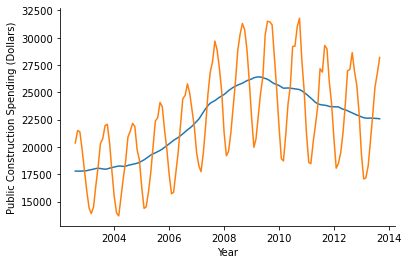

In [14]:
def sqErr(row):
    return (row['Public Construction'] - row['MovAvg'])**2

df_Construction['MovAvg'] = np.NaN
df_Construction['sqErr'] = np.NaN

date_data = {'Jan' : ('01', '31'), 'Feb' : ('02', '28'), 'Mar' : ('03', '31'), 'Apr' : ('04', '30'), 'May' : ('05', '31'), 'Jun' : ('06', '30'), 'Jul' : ('07', '31'), 'Aug' : ('08', '31'), 'Sep' : ('09', '30'), 'Oct' : ('10', '31'), 'Nov' : ('11', '30'), 'Dec' : ('12', '31')}
def to_data_range(date_str):
    return '20' + date_str[-2:] + '-' + date_data[date_str[:3]][0] + '-' + date_data[date_str[:3]][0]
df_Construction['Date'] = df_Construction['Month-Year'].apply(to_data_range)
df_Construction.index = pd.date_range(start=df_Construction['Date'].iloc[0], periods = df_Construction['Date'].shape[0], freq='M')

window = 12
window = window - window % 2
# Compute the moving average in the loop below using a window centered on the data point whose average is eing computed
for i in range(int(window/2),df_Construction.shape[0]-int(window/2)):
    df_Construction.loc[df_Construction.index[i],'MovAvg'] = (0.5*df_Construction.iloc[i - int(window/2)]['Public Construction'] + df_Construction.iloc[i - int(window/2)+1:i + int(window/2)]['Public Construction'].sum() + 0.5*df_Construction.iloc[i + int(window/2)]['Public Construction'])/float(window)

df_Construction['sqErr'] = (df_Construction['Public Construction'] - df_Construction['MovAvg'])**2


# The moving average cannot be applied to all rows and we need to delete those rows because we cannot use them in the analysis
df_Construction.dropna(how='any',inplace=True)

fig,ax = plt.subplots()
ax.plot(df_Construction['MovAvg'],label='Moving Avg.')
ax.plot(df_Construction['Public Construction'],label='Public Construction')
ax.set_xlabel('Year')
ax.set_ylabel('Public Construction Spending (Dollars)')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
print('Average Squared Error per Month: ',sum(df_Construction['sqErr'])/len(df_Construction))
print(df_Construction)

In [15]:
df_Construction['R1'] = df_Construction['Public Construction'] - df_Construction['MovAvg']
df_Construction['R1Error'] = abs((df_Construction['Public Construction'] - df_Construction['R1'])/df_Construction['Public Construction'])
df_Construction.style.format({
    'MovAvg': '{:.1f}'.format,
    'sqErr': '{:,.1f}'.format,
    'R1': '{:,.1f}'.format,
    'R1Error': '{:,.3f}'.format
})

,Month,Month-Year,Total Construction,Private Construction,Public Construction,MovAvg,sqErr,Date,R1,R1Error
2002-07-31 00:00:00,7,Jul-02,78863,58494,20369,17793.2,"6,634,702.7",2002-07-07,"2,575.8",0.874
2002-08-31 00:00:00,8,Aug-02,79460,57953,21507,17791.3,"13,806,488.4",2002-08-08,"3,715.7",0.827
2002-09-30 00:00:00,9,Sep-02,76542,55157,21385,17787.8,"12,939,608.0",2002-09-09,"3,597.2",0.832
2002-10-31 00:00:00,10,Oct-02,75710,56023,19687,17802.3,"3,552,125.5",2002-10-10,"1,884.7",0.904
2002-11-30 00:00:00,11,Nov-02,71362,53552,17810,17803.8,39.1,2002-11-11,6.2,1.000
2002-12-31 00:00:00,12,Dec-02,63984,48023,15961,17834.2,"3,509,065.6",2002-12-12,"-1,873.2",1.117
2003-01-31 00:00:00,13,Jan-03,59877,45473,14404,17888.7,"12,142,901.8",2003-01-01,"-3,484.7",1.242
2003-02-28 00:00:00,14,Feb-03,58526,44620,13906,17923.5,"16,140,306.2",2003-02-02,"-4,017.5",1.289
2003-03-31 00:00:00,15,Mar-03,64506,49996,14510,17971.0,"11,978,521.0",2003-03-03,"-3,461.0",1.239
2003-04-30 00:00:00,16,Apr-03,69638,53195,16444,18026.2,"2,503,251.4",2003-04-04,"-1,582.2",1.096


Average Residual:  57.485074626865725


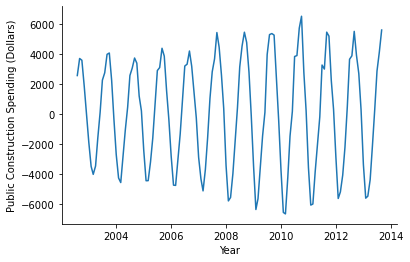

In [16]:
fig,ax = plt.subplots()
ax.plot(df_Construction['R1'])
ax.set_xlabel('Year')
ax.set_ylabel('Public Construction Spending (Dollars)')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
print('Average Residual: ', sum(df_Construction['R1'])/len(df_Construction))

In [17]:
maxCorr = 0.0
period = np.NaN
for i in range(1,37):
    corr = df_Construction['R1'].autocorr(lag=i)
    print('Correlation, lag ',i,'   ',corr)
    if corr > maxCorr:
        maxCorr = corr
        period = i
print('period = ',period,'     Maximum Correlation = ',maxCorr)

Correlation, lag  1     0.8486260794687956
Correlation, lag  2     0.4813829189118816
Correlation, lag  3     -0.012518854677954341
Correlation, lag  4     -0.5037936790405376
Correlation, lag  5     -0.8444517003136985
Correlation, lag  6     -0.9648820663268396
Correlation, lag  7     -0.8433331333098901
Correlation, lag  8     -0.49319137831949866
Correlation, lag  9     0.003706338528959615
Correlation, lag  10     0.4871379355718062
Correlation, lag  11     0.8469321834384937
Correlation, lag  12     0.9888511486124667
Correlation, lag  13     0.8425915291399987
Correlation, lag  14     0.48416017714932164
Correlation, lag  15     -0.014370972294362669
Correlation, lag  16     -0.5036781101675366
Correlation, lag  17     -0.8390472428814718
Correlation, lag  18     -0.9594254272891753
Correlation, lag  19     -0.8378035112340599
Correlation, lag  20     -0.48867498068652915
Correlation, lag  21     0.0008985498131579399
Correlation, lag  22     0.4824185684841992
Correlation, lag 

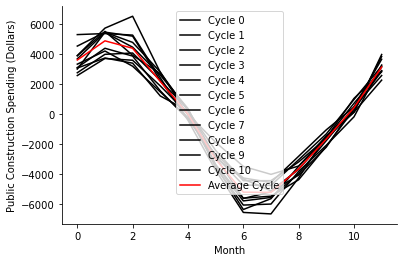

In [18]:
period = 12
cycleLen = period
numCycles = int(len(df_Construction)/cycleLen + 0.5)
cycles = [df_Construction.iloc[range(i*period,min((i+1)*period,len(df_Construction)))]['R1'] for i in range(numCycles)]
ptsInCycles = [df_Construction.iloc[range(i,len(df_Construction['R1']),period)]['R1'].tolist() for i in range(period)]
avg = [sum(pts)/len(pts) for pts in ptsInCycles]

fig,ax = plt.subplots()
for i in range(len(cycles)):
    ax.plot(cycles[i].values,label='Cycle '+str(i),c='k')
ax.plot(avg,label='Average Cycle',c='r')
ax.set_xlabel('Month')
ax.set_ylabel('Public Construction Spending (Dollars)')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.legend()

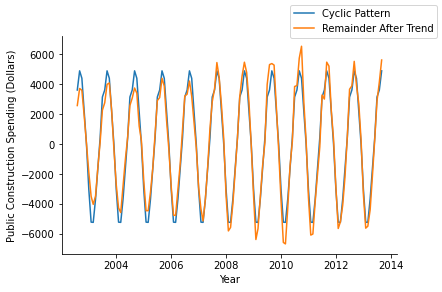

In [19]:
cycleLen = period   # see prior cell for computation of cyclicality period
numCycles = int(len(df_Construction)/cycleLen + 0.5)
df_Construction['C'] = np.NaN   # Creates an empty column for the cyclicality component data
for i in range(len(df_Construction)):
    df_Construction.loc[df_Construction.index[i], 'C'] = avg[i % cycleLen] # Write appropriate cyclicality value

fig,ax = plt.subplots()
ax.plot(df_Construction['C'],label='Cyclic Pattern')
ax.plot(df_Construction['R1'],label='Remainder After Trend')
ax.set_xlabel('Year')
ax.set_ylabel('Public Construction Spending (Dollars)')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
fig.legend()

Average Error:  0.009745383568534131
            Month Month-Year  Total Construction  Private Construction  \
2002-07-31      7     Jul-02               78863                 58494   
2002-08-31      8     Aug-02               79460                 57953   
2002-09-30      9     Sep-02               76542                 55157   
2002-10-31     10     Oct-02               75710                 56023   
2002-11-30     11     Nov-02               71362                 53552   
...           ...        ...                 ...                   ...   
2013-04-30    136     Apr-13               70535                 50022   
2013-05-31    137     May-13               77327                 54369   
2013-06-30    138     Jun-13               81722                 56228   
2013-07-31    139     Jul-13               83104                 56354   
2013-08-31    140     Aug-13               85677                 57481   

            Public Construction        MovAvg        Date           R1  \


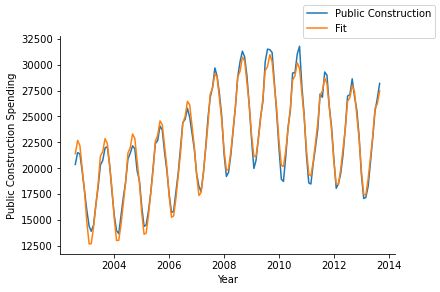

In [20]:
df_Construction['R2'] = df_Construction['R1'] - df_Construction['C']
df_Construction['R2Error'] = abs(df_Construction['R2']/df_Construction['Private Construction'])
df_Construction['fit'] = df_Construction['MovAvg'] + df_Construction['C']
df_Construction.drop(['sqErr'],axis=1,inplace=True)
print('Average Error: ', sum(df_Construction['R2Error'])/len(df_Construction))
print(df_Construction)
fig,ax = plt.subplots()
ax.plot(df_Construction['Public Construction'],label='Public Construction')
ax.plot(df_Construction['fit'], label = 'Fit')
ax.set_xlabel('Year')
ax.set_ylabel('Public Construction Spending')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
fig.legend()

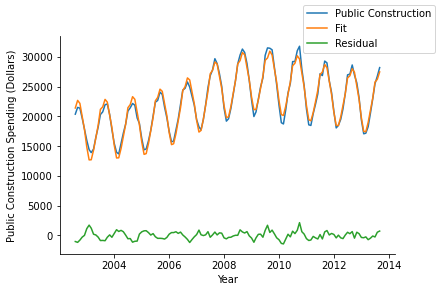

In [21]:
fig,ax = plt.subplots()
ax.plot(df_Construction['Public Construction'],label='Public Construction')
ax.plot(df_Construction['fit'],label='Fit')
ax.plot(df_Construction['R2'],label='Residual')
ax.set_xlabel('Year')
ax.set_ylabel('Public Construction Spending (Dollars)')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
fig.legend()

In [22]:
for a in [0.1 * i for i in range(1,20)]:
    df_Construction['aC'] = a*df_Construction['C']
    df_Construction['R3'] = df_Construction['R1'] - df_Construction['aC']
    df_Construction['sqErr'] = df_Construction['R3']**2
    print('Squared Error for a =','{:.1f}'.format(a),':',sum(df_Construction['sqErr']))
    #print('Average Error: ', sum(dfHS['R2Error'])/len(dfHS))

Squared Error for a = 0.1 : 1426494372.8684332
Squared Error for a = 0.2 : 1138628289.8563435
Squared Error for a = 0.3 : 884628804.8456756
Squared Error for a = 0.4 : 664495917.8364309
Squared Error for a = 0.5 : 478229628.8286083
Squared Error for a = 0.6 : 325829937.8222076
Squared Error for a = 0.7 : 207296844.81722978
Squared Error for a = 0.8 : 122630349.81367418
Squared Error for a = 0.9 : 71830452.81154072
Squared Error for a = 1.0 : 54897153.81082963
Squared Error for a = 1.1 : 71830452.81154083
Squared Error for a = 1.2 : 122630349.81367444
Squared Error for a = 1.3 : 207296844.81723017
Squared Error for a = 1.4 : 325829937.8222086
Squared Error for a = 1.5 : 478229628.82860845
Squared Error for a = 1.6 : 664495917.8364316
Squared Error for a = 1.7 : 884628804.8456765
Squared Error for a = 1.8 : 1138628289.8563442
Squared Error for a = 1.9 : 1426494372.8684344
